Case statement:

1. Fake news in diffrent platforms is spreading widely and matter of serious concern it.
2. it causues social wars and permanent breakage of bonds established by the among people.
3. lot of researches are finding the classification fake news.

Steps to be followed.
1. Importing libraries and dataset
2. Data Preprocessing
3. Preprocessing and analysis of new column
4. Converting text to vectors
5. Model training, evalution and prediction.

## Importing Libraries and Datasets

In [31]:
# import the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# import the dataset

# dataset link : https://drive.google.com/file/d/1q5jpI5M1EA9x3YPrLupmiu3gffkmGlHj/view

dataset = pd.read_csv('/content/News.csv', index_col = 0)

## Data Preprocessing

In [34]:
dataset.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [21]:
# lets check the dataset shape
dataset.shape

(44919, 5)

In [25]:
# as the title, subject and date columns not going to help to check fake news.
# so we are dropping these columns

data = dataset.drop(['title', 'subject', 'date'], axis=1)

In [27]:
# lets check the columns data types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44919 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44919 non-null  object
 1   class   44919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [28]:
# check null values in the dataset

data.isna().sum()

text     0
class    0
dtype: int64

In [ ]:
# now we have to shuffle the dataset to prevent the model to get biased.
# after that we reset the index and then drop it. bacause index column not helping us.

In [29]:
# shuffling

data = data.sample(frac=1)
data.reset_index(inplace = True)
data.drop(['index'], axis=1, inplace = True)

<Axes: xlabel='class', ylabel='count'>

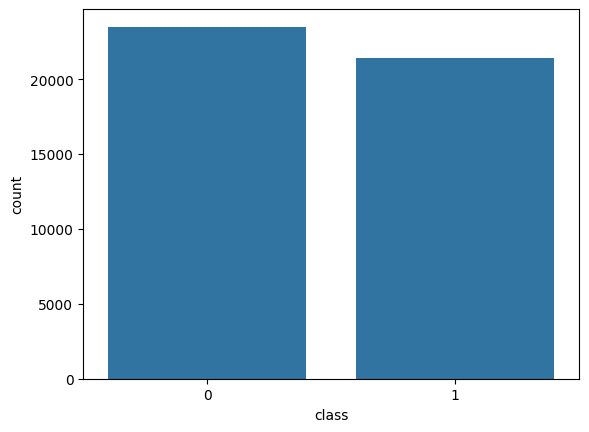

In [32]:
# lets explore the unique values in each category using below code

sns.countplot( x ='class', data = data, order = data['class'].value_counts().index)

## Preprocessing and analysis of new columns

In [ ]:
# firstly we will remove all the stopwords, punctuations and irrelavant spaces from the text
# from the NLTK library required and some of module need to be downloaded.

In [36]:
from tqdm import tqdm
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
 # once we add all required modules and we can create function name preprocess text.
 # this function will preprocess the data in given input

def preprocess_text(text_data):

  # creating list of preprocessed text
  preprocessed_text = []

  for sentence in tqdm(text_data):
    sentence = re.sub(r'[^\w\s]', '', sentence)
    preprocessed_text.append(' '.join(
        token.lower() for token in str(sentence).split() if token not in stopwords.words('english')
        ))
  return preprocessed_text

In [38]:
# to implement the function in all the news in text column

preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [34:41<00:00, 21.58it/s]


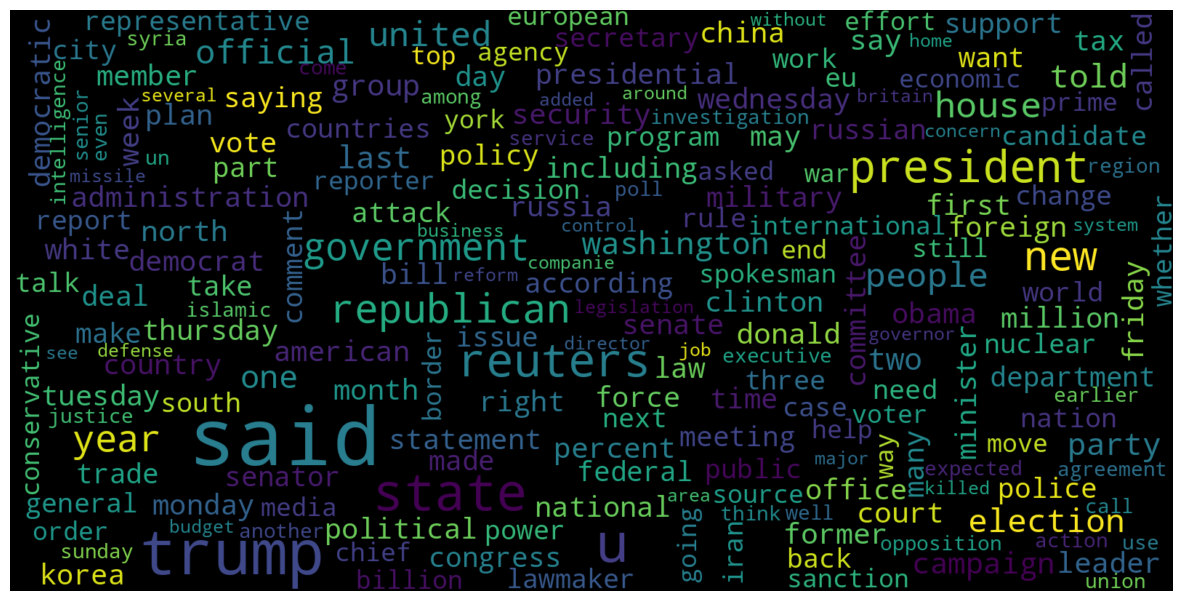

In [39]:
# lets visualize the real and fake words in dataset

# first we check real words or genunie

consolidated = ' '.join( word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width = 1600,
                      height = 800,
                      random_state =21,
                      max_font_size=110,
                      collocations = False)

plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

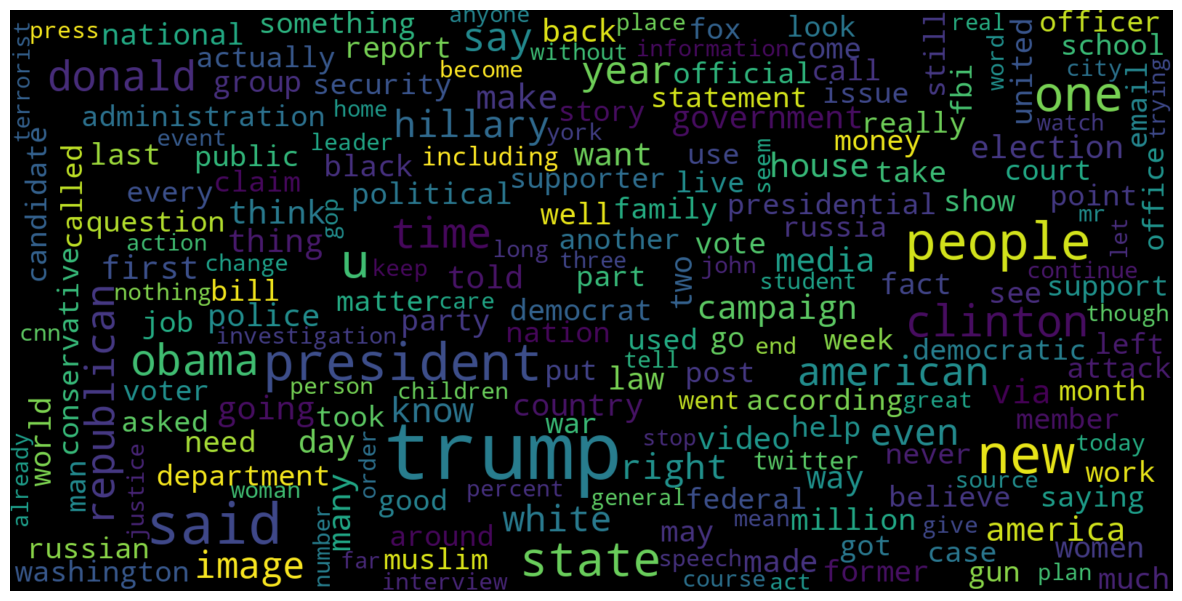

In [40]:
# now lets check the fake words in dataset

consolidated = ' '.join(word for word in data['text'][data['class'] == 0].astype(str))

wordCloud = WordCloud(width = 1600,
                      height = 800,
                      random_state = 21,
                      max_font_size = 110,
                      collocations = False)


plt.figure(figsize = (15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [48]:
# lets visualize the top 20 most frequent words

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n= None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_of_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_of_words[0,idx]) for word, idx in vec.vocabulary_.items()]

  words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)

  return words_freq[:n]

<Axes: title={'center': 'Bar Chart of the Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

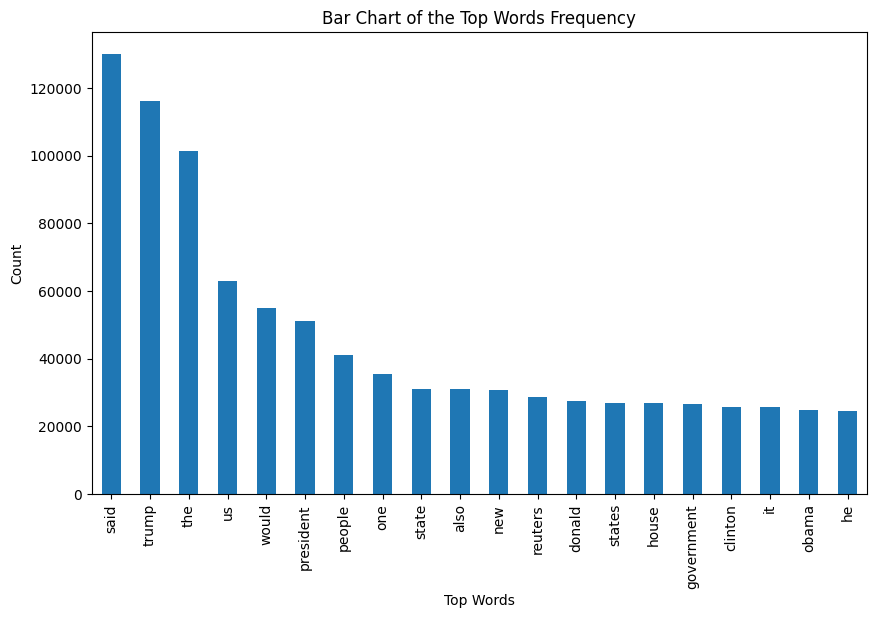

In [49]:
common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])


df1.groupby('Review').sum()['count'].sort_values(ascending = False).plot(
    kind = 'bar',
    figsize = (10,6),
    xlabel = 'Top Words',
    ylabel = 'Count',
    title = 'Bar Chart of the Top Words Frequency'
)


## Converting the text into vectors


In [51]:
# before converting text into vectors. we must to split the dataset into train set and test set

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'],
                                                    test_size = 0.2,random_state = 21)


In [ ]:
# TfidfVectorizer plays a crucial role in natural language processing (NLP)
# - tasks by transforming text into numerical representations that machines can understand.
# - This transformation captures the importance and relevance of words within documents,
# - making it valuable for various applications.

In [52]:
# now converting the text data into vector by using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


## Model Training, Evalution and Prediction

In [54]:
# now our dataset is ready to train the model

# for training we will use logistic regression and predicting the accuracy by using the
# - accuracy score

from sklearn.linear_model import LogisticRegression

lg_regression = LogisticRegression()
lg_regression.fit(X_train, y_train)

# testing the model
print(f'Train set accuracy : {accuracy_score(y_train, lg_regression.predict(X_train))}')
print(f'Test set accuracy : {accuracy_score(y_test, lg_regression.predict(X_test))}')

Train set accuracy : 0.9936830388200918
Test set accuracy : 0.9889804096170971


In [56]:
# Lets train with decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# testing the model
print(f'Train set accuracy : {accuracy_score(y_train, dt_classifier.predict(X_train))}')
print(f"Test set accuracy : {accuracy_score(y_test, dt_classifier.predict(X_test))}")

Train set accuracy : 0.999972171977181
Test set accuracy : 0.997439893143366


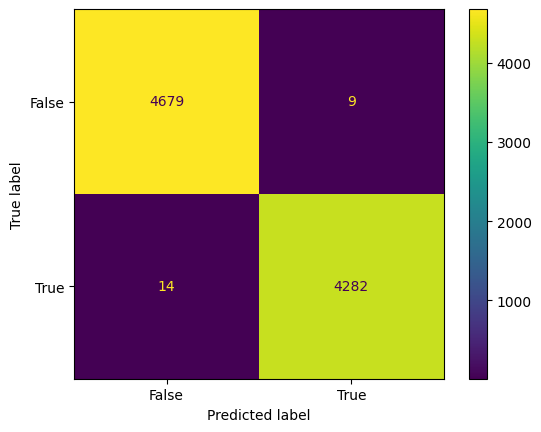

In [59]:
# confusion matrix will be displayed below by using decision tree classifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, dt_classifier.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = [False, True])

cm_display.plot()

plt.show()

Conclusion:

1. decision tree and logistic regresion performed well.

2. finally now we are able to find the fake news by using these above two models.

3. we can see that we getting good accuracy.



0    23502
1    21417
Name: class, dtype: int64